In [1]:
import numpy as np
import matplotlib.pyplot as plt

Number of function calls for classic rk4 is: 792
Number of function evaluations per step is: 4.0


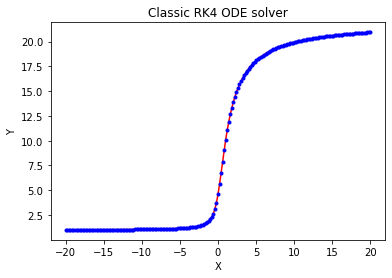

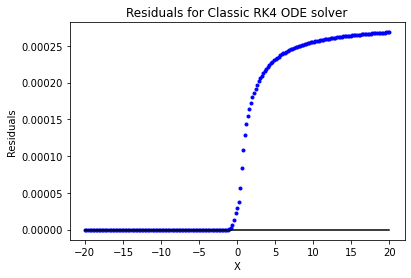

In [105]:
def f(x, y):
    f.counter += 1
    return y/(1+x**2)
f.counter = 0

def true(x, y0, x0):
    ##True solution to ODE
    sol =  y0*np.exp(np.arctan(x)-np.arctan(x0))
    return sol

def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

y0 = 1
nsteps = 199
x = np.linspace(-20, 20, nsteps)

true_y = true(x, y0, x[0])

rk4_y = np.zeros(len(x))
rk4_y[0] = y0
for i in range(len(x)-1):
    h = x[i+1] - x[i]
    new_y = rk4_step(f, x[i], rk4_y[i], h)
    rk4_y[i+1] = new_y


print('Number of function calls for classic rk4 is:', f.counter)
print('Number of function evaluations per step is:', f.counter / (len(x)-1))


plt.plot(x, true_y, 'r')
plt.plot(x, rk4_y, 'b.')
plt.plot()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Classic RK4 ODE solver')
plt.show()

plt.plot(x, true_y - rk4_y, 'b.')
plt.plot(x, true_y*0, 'k')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals for Classic RK4 ODE solver')
plt.show()

Number of function calls for half-step size rk4 is: 792
Number of function evaluations per step is: 12.0


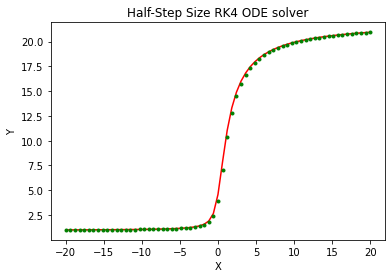

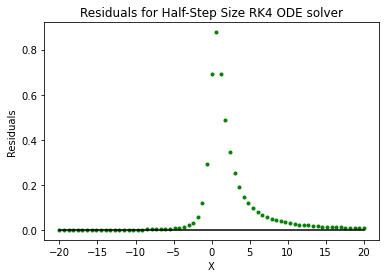

In [108]:
#Reset counter 
f.counter = 0

def rk4_stepd(fun, x, y, h):
    y1 = rk4_step(fun, x, y, h)
    y2_bis = rk4_step(fun, x, y, h/2)
    y2 = rk4_step(fun, x, y2_bis, h/2)
    Delta = y2 - y1
    return y2 + Delta/15

y0 = 1
nsteps = round(200/3)
x = np.linspace(-20, 20, nsteps)

true_y = true(x, y0, x[0])

rk4d_y = np.zeros(len(x))
rk4d_y[0] = y0
for i in range(len(x)-1):
    h = x[i+1] - x[i]
    new_yd = rk4_stepd(f, x[i], rk4d_y[i], h)
    rk4d_y[i+1] = new_yd


print('Number of function calls for half-step size rk4 is:', f.counter)
print('Number of function evaluations per step is:', f.counter / (len(x)-1))
plt.plot(x, true_y, 'r')
plt.plot(x, rk4d_y, 'g.')
plt.plot()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Half-Step Size RK4 ODE solver')
plt.show()

plt.plot(x, true_y - rk4d_y, 'g.')
plt.plot(x, true_y*0, 'k')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals for Half-Step Size RK4 ODE solver')
plt.show()

In [113]:
import numpy as np
from scipy import integrate
import time
def fun(x,y,half_life=[4.468e9,1e-5]):
    #let’s do a 2-state radioactive decay
    dydx=np.zeros(len(half_life)+1)
    dydx[0]=-y[0]/half_life[0]
    dydx[1]=y[0]/half_life[0]-y[1]/half_life[1]
    dydx[6]=y[1]/half_life[1]
    return dydx
y0=np.asarray([1,0,0])
x0=0
x1=1
t1=time.time();
ans_rk4=integrate.solve_ivp(fun,[x0,x1],y0);
t2=time.time();
print('took',ans_rk4.nfev,'evaluations and',t2-t1,'seconds to solve with RK4.')
t1=time.time()
ans_stiff=integrate.solve_ivp(fun,[x0,x1],y0,method='Radau')
t2=time.time()
print('took',ans_stiff.nfev,'evaluations and',t2-t1,'seconds to solve implicitly')
print('final values were',ans_rk4.y[0,-1],'and',ans_stiff.y[0,-1],'with truth',np.exp(-1*(x1-x0)))

took 212618 evaluations and 4.429476261138916 seconds to solve with RK4.
took 72 evaluations and 0.013993024826049805 seconds to solve implicitly
final values were 0.3678794411714445 and 0.3678803705878814 with truth 0.36787944117144233
